In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn; seaborn.set()


In [ ]:
'''
2000年無R紅大益7542 = 1688
2001年紅大益簡體 = 1519
2001年中茶綠印繁體雲7542 = 1096
2002年中茶黃印7542 = 1650
2002年211中茶黃印7542 = 1107
2002年215中茶綠印 = 1642
2002年208中茶綠印7542 = 1641
2003年中茶綠印7542 = 1303
2003年912咖啡大益7542 = 1620
2003年203紅大益7542 = 1619
2003年 紫大益7542 = 1301
501 7542 = 2003
508 7542 = 2434
604 7542 = 1347
702 7542 = 2054
802 7542 = 1159
912 中茶綠印 = 2078
1301 經典7542 = 903
1301 新版7542 = 912
1401 7542 = 1128
1401 經典7542 =  1362
1501 7542 = 1491
1601 7542 = 1523
1701 7542 = 1709
1801 7542 = 1826
1901 7542 = 2018
2001 7542 = 2354
201 經典7542 = 905
'''

In [ ]:
'''
1602 8582 = 2145
1901 8582 = 2130
806 8582 = 1992
602/603 8582 = 1761
2003年 101 中茶綠印8582 = 430
2003年 912 藍大益 8582 = 1622
2003年 雲梅8582 = 1568
401 8582 = 408
501 8582 = 1363
502 8582 = 632
504 8582 = 1320
601 8582 = 199
701 8582 = 1133
702 8582 = 563
801 8582 = 80
804/805 8582 = 551
901 8582 = 84
1301 8582 = 889
1601 8582 = 1559
001 8582 = 141
002 8582 = 726
101 8582 = 64
103 8582 = 193
201 8582 = 743
202 8582 = 764
'''

In [2]:
def get_TAE_price_record(number):
    driver = webdriver.PhantomJS(executable_path='/Users/alex/Desktop/new_jupyter/phantomjs') #因檔案在Javascript中，使用PhantomJS模組可觀察
    driver.get('https://www.donghetea.com/goods.php?id={}'.format(number)) #格式化設定，可以輸入想查詢的號碼
    pageSource = driver.page_source
    #print(pageSource)
    soup = BeautifulSoup(pageSource, 'lxml')
    #tea_columns = [t.text.split(sep=', ') for t in soup.find('tr')]
    tea_rows = [t.text for t in soup.find('div', 'tabqushi').select('td')] #從湯中尋找div並找到td
    df = pd.DataFrame()
    df['截止日期'] = tea_rows[0:2000:6] #資料中每六個跳一列，依照規律設定為6
    df['參考價'] = tea_rows[1:2000:6]
    df['漲跌額'] = tea_rows[2:2000:6]
    df['漲跌幅'] = tea_rows[3:2000:6]
    df['日均漲跌額'] = tea_rows[4:2000:6]
    df['日均漲跌幅'] = tea_rows[5:2000:6]
    #print(type(df))
    #df = df.head() 如果只想找前幾個，可以使用head()函數達到目的
    return df
    

In [11]:
number = input()
df_tea_price_record = get_TAE_price_record(number)
df_tea_price_record

2354


,截止日期,參考價,漲跌額,漲跌幅,日均漲跌額,日均漲跌幅
0,2021-01-15,￥77000,降￥1000,↓ 1.3%,降￥250,↓ 0.30%
1,2021-01-11,￥78000,降￥3000,↓ 3.7%,降￥231,↓ 0.30%
2,2020-12-29,￥81000,升￥3000,↑ 3.8%,升￥300,↑ 0.40%
3,2020-12-19,￥78000,升￥1500,↑ 2%,升￥1500,↑ 2.00%
4,2020-12-19,￥76500,升￥1500,↑ 2%,升￥136,↑ 0.20%
...,...,...,...,...,...,...
297,2020-05-05,￥38000,降￥1000,↓ 2.6%,降￥1000,↓ 2.60%
298,2020-05-05,￥39000,升￥1000,↑ 2.6%,升￥1000,↑ 2.60%
299,2020-05-05,￥38000,升￥500,↑ 1.3%,升￥500,↑ 1.30%
300,2020-05-05,￥37500,升￥1500,↑ 4.2%,升￥1500,↑ 4.20%


<ipython-input-12-bf1931b44b63>:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axes.set_title('大益-2001_7542', color='r', fontsize=100, FontProperties=my_font) #設定中文字體
<ipython-input-12-bf1931b44b63>:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axes.set_xlabel('Date', fontsize=100, color='r', FontProperties=my_font)
<ipython-input-12-bf1931b44b63>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(['2020年4月', '2020年5月', '2020年6月', '2020年7月', '2020年8月', '2020年9月', '2020年10月', '2020年11月', '2020年12月','2021年1月', '2021年2月'], FontProperties=my_font)
<ipython-input-12-bf1931b44b63>:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axes.set_xticklabels(['2020年4月', '2020年5月

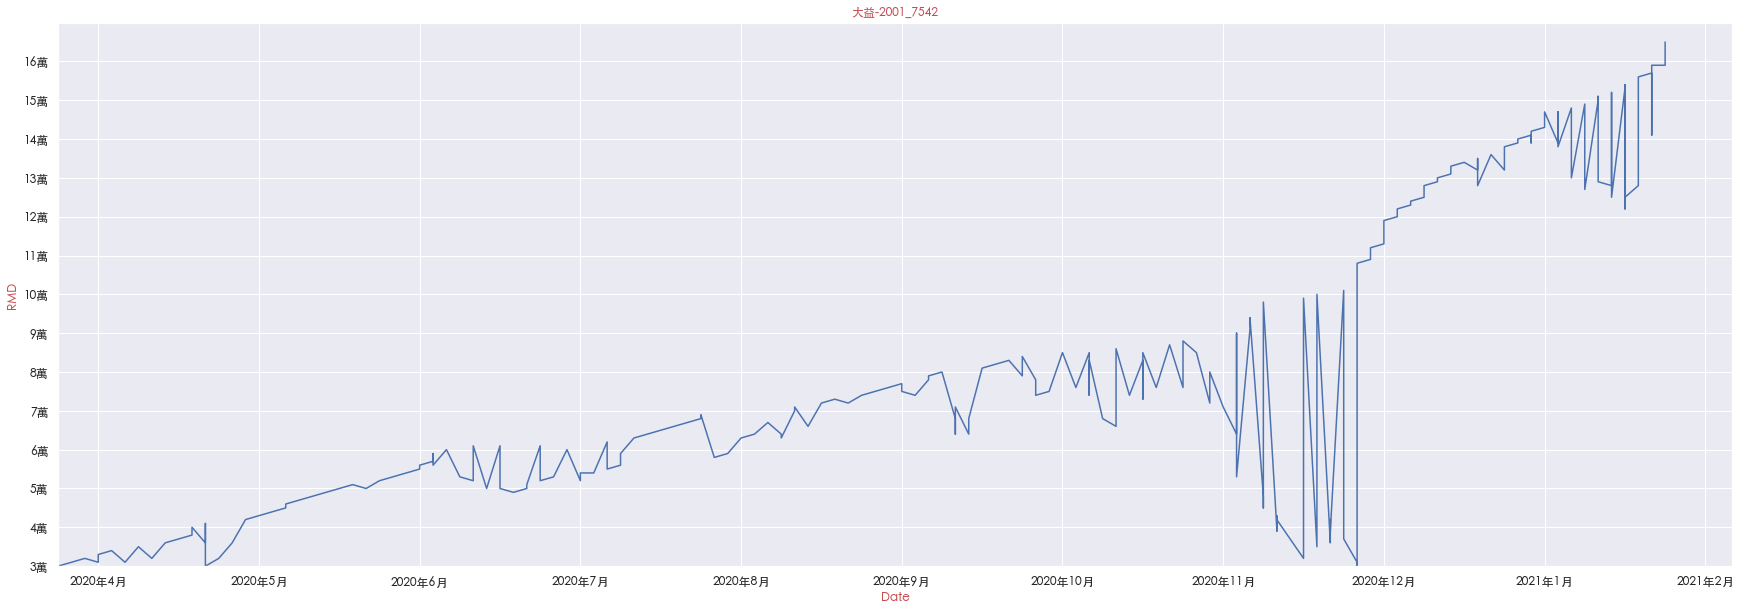

In [12]:
x = df_tea_price_record['截止日期']
y = df_tea_price_record['參考價']

my_font = FontProperties(fname='STHeiti Medium.ttc') #中文字體 my_font

fig, axes = plt.subplots(figsize=(30, 10))
axes = plt.axes()

axes.set_title('大益-2001_7542', color='r', fontsize=100, FontProperties=my_font) #設定中文字體
axes.set_xlabel('Date', fontsize=100, color='r', FontProperties=my_font)
#原始資料的日期非常多，製作圖表時會影響視覺感，重新設定以月份為主。
axes.set_xticklabels(['2020年4月', '2020年5月', '2020年6月', '2020年7月', '2020年8月', '2020年9月', '2020年10月', '2020年11月', '2020年12月','2021年1月', '2021年2月'], FontProperties=my_font)
axes.set_xticks(np.arange(3, 290, 12)) #X軸刻度設定
axes.set_xlim(0, 125) #設定圖表的線性長度

axes.set_ylabel('RMD', fontsize=100, color='r', FontProperties=my_font)
axes.set_yticklabels(['3萬', '4萬', '5萬', '6萬', '7萬', '8萬', '9萬', '10萬', '11萬', '12萬', '13萬', '14萬', '15萬', '16萬'], 
                     FontProperties=my_font) #因價格數字複雜，重新設定價格標示
axes.set_yticks(np.arange(0, 200, 10)) #Y軸刻度設定
axes.set_ylim(0, 140) #設定Y軸平均間格

axes.plot(x, y)
plt.show()